# Lecture 16: Unsupervised learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
import utils as utils
from IPython.display import display, HTML

# Inline plotting
%matplotlib inline

# Make sympy print pretty math expressions
sy.init_printing()

utils.load_custom_styles()

---
## Notation

- $\bar{\mathbf{x}}$: centered sample i.e., $\mathbf{x} - \mu$
- $\hat{\mathbf{x}}$: standardised sample
- $\tilde{\mathbf{x}}$: $l_2$ normalised sample
- $\dot{\mathbf{x}}$: $l_1$ normalised sample
- $\ddot{\mathbf{x}}$: rotated sample so as to correspond to the principle axes

---
## Data Preprocessing

Data preprocessing is the boring tasks of preparing the data so it can be processed by ML algorithms. This includes:
- Formatting: convert the data into a readable format like CSV.
- Cleaning: remove or fix missing data to avoid errors in computations. Sometimes, we need to remove data points that are irrelavant for the task at hand
- Samping: reduce the data set by random sampling i.e., selecting representative samples
  - is used to reduce computational and memory requirements
  - allows for faster prototyping before using the whole data set
  - somtimes we need to downsample or upsample the data points to evenly distribute samples from all classes when data is unbalanced. 
- Scaling: ensure that the relative scale and range of all dimensions of the samples are the same e.g. in the range $[0, 1]$

**Why is data preprocessing required?** E.g. in clustering, the results of clustering depends on various factors like the relative scale of the various dimensions of the data. Many ML algorithms assume that the scale of each dimension is between 0 and 1. 

---
### Data Centering

<img src="figures/lecture-16/data-centering.png" width="600" />












Data centering makes the various dimensions contribute equally to the optimization of the criterion used in subsequent steps (in the case of equal dimension scales). When scaling of the various dimensions is not equal, an additional scaling process can be applied.

---
### Data Standardisation

<img src="figures/lecture-16/data-standardisation.png" width="600" />













---
### Data Normalisation

<img src="figures/lecture-16/data-normalisation.png" width="600" />
















<img src="figures/lecture-16/figure-2.1.png" width="600" />






















---
### Rotation

<img src="figures/lecture-16/rotation.png" width="600" />









---
## Distance Metrics

---
### Euclidean

<img src="figures/lecture-16/euclidean-distance.png" width="600" />








**Squared Euclidean**: The standard Euclidean distance can be squared in order to place progressively greater weight on objects that are farther apart.

\begin{align}
d_{SE}(\mathbf{x}_i, \mathbf{x}_j) 
&= \lVert \mathbf{x}_i - \mathbf{x}_j \rVert_2^2 \\
&= (\mathbf{x}_i - \mathbf{x}_j)^T (\mathbf{x}_i - \mathbf{x}_j)
\end{align}

<div class="warning">
Squared Euclidean distance is not a metric, as it does not satisfy the triangle inequality; however, it is frequently used in optimization problems in which distances only have to be compared.
</div>

---
### Manhattan

<img src="figures/lecture-16/manhattan-distance.png" width="600" />








---
### Minkowski

<img src="figures/lecture-16/minkowski-distance.png" width="600" />








---
## Similarity Measures

A similarity measure or a similarity function is a function $s: \mathbb{R}^D \times \mathbb{R}^D \to \mathbb{R}$ that quantifies how similar two samples $\mathbf{x}_i \in \mathbb{R}^D$ and $\mathbf{x}_j \in \mathbb{R}^D$ are.

### Why are similarity measures important?
- It is natural to assume that two similar samples share the same properties, e.g. they belong to the same class, the same cluster, etc
- They can be used in order to define optimization criteria for defining the parameters of a model



### Why should be careful to use similarity measures?
- 


### Distance-based Similarity Functions

Some similarity functions are defined based on a distance metric. The following similarity function is called the **heat kernel** or the RBF kernel:

<img src="figures/lecture-16/distance-based-similarity-1.png" width="600" />


where $d(\cdot, \cdot)$ can be replaced with any of the above distance functions and $\sigma$ is a scaling parameter.

Here are three plots with different $\sigma$ values:

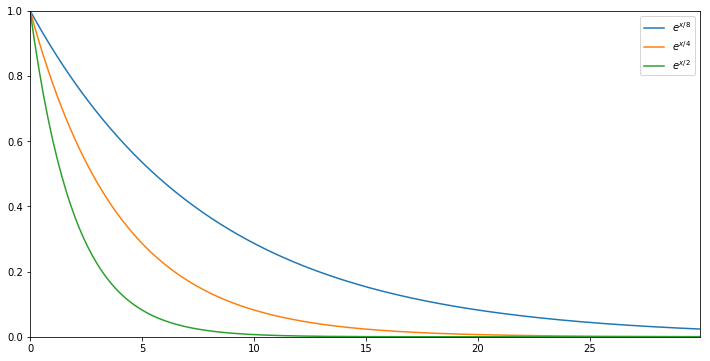

In [2]:
x = np.arange(0, 30, 0.1)
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x, np.exp(-x/8), label='$e^{x/8}$')
ax.plot(x, np.exp(-x/4), label='$e^{x/4}$')
ax.plot(x, np.exp(-x/2), label='$e^{x/2}$')
ax.set_xlim(x.min(), x.max())
ax.set_ylim(0, 1)
ax.legend()

Why is this happening? The exponential function $e^{x}$ for negative values yields values between 0 and 1. 

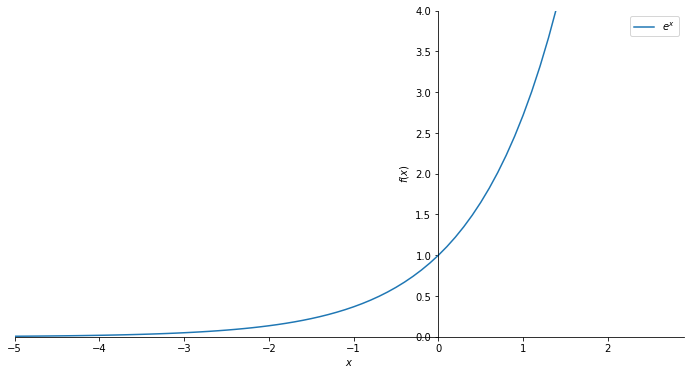

In [3]:
x = np.arange(-5, 3, 0.1)
y = np.exp(x)
fig, ax = utils.prepare_plot(x, y,
                             figsize=(12, 6),
                             xlimit=(x.min(), x.max()),
                             ylimit=(0, 4))
ax.plot(x, np.exp(x), label='$e^{x}$')
ax.legend();

<div class="sidenote">
The above similarity function looks like the Radial Basis Function (RBF). The key idea behind RBF is that nearby samples have greater similarity than samples that are father away. Imagine that one sample $\mathbf{x}_i$ is at the top of a mountain peak. The closer another sample $\mathbf{x}_j$ is to the top the more influence it gets. This is illustrated by the figure below:
    <br/>

<img src="figures/lecture-16/mountain-peak.png" width="300" />

</div>

### Special Similarity Functions

Another distance-based similarity function is:

<img src="figures/lecture-16/distance-based-similarity-2.png" width="600" />


The similarity function is inversely propotional to the distance between the samples $\mathbf{x}_i$ and $\mathbf{x}_j$ i.e., when the distance between the two samples is low then the similarity function yields a high value and vice versa.

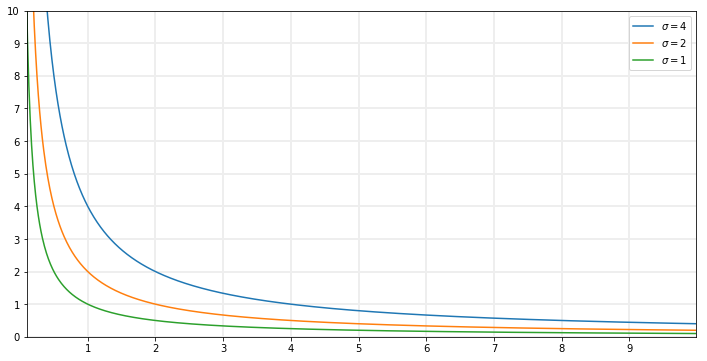

In [4]:
import matplotlib.ticker as ticker

x = np.arange(0.1, 10, 0.01)
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x, 4/x, label='$\sigma=4$')
ax.plot(x, 2/x, label='$\sigma=2$')
ax.plot(x, 1/x, label='$\sigma=1$')
ax.set_xlim(x.min(), x.max())
ax.set_ylim(0, 10)
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.grid(color='#eeeeee', linestyle='-', linewidth=2)
ax.legend()

We can also have similarity functions that are not based on a distance function. The similarity function below defines the similarity between the two vectors based on the angle they form in the $D$-dimensional Euclidean space:

<img src="figures/lecture-16/angle-based-similarity.png" width="600" />



---
## Principle Component Analysis

PCA is a linear transformation method that allows us to project a $D$-dimensional dataset into a $K$-dimensional subspace such that the variance (spread) in each dimension in our dataset is maximised. 

The transformation or projection happens as follows:
$$
\mathbf{y}_i = W^T \mathbf{x}_i
$$
where
- $\mathbf{x}_i \in \mathbb{R}^D$ is the $i$th sample in our dataset $X \in \mathbb{R}^{D \times N}$
- $W$ is a $D \times d$ projection matrix where $d \leq D$. When $d=D$, PCA does not perform any dimensionality reduction but just rotates each of the data points' dimensions to the principal axes i.e., the direction corresponding to the maximal spread of the data. Reducing the number of dimensions is simply a matter of removing columns from $W$.
- $\mathbf{y}_i \in \mathbb{R}^d$ is the transformed data point


We can also express the transformation with all our dataset as follows:

$$
Y=W^T X
$$


The trick is to find a projection matrix $W$ that maximises the variance in each direction. 

---
### Scatter Matrix

Before we can find $W$, we need a way to express the variance formally since we want to find $W$ with maximum variance. The variance of the transformed data can be expressed as:

<img src="figures/lecture-16/scatter-matrix-expression.png" width="500" />


Let us make this more concrete:

In [5]:
N = 5
D = 2
center_of_points = np.array([0.5, 0.5])
cov = np.eye(D)
np.random.seed(42)
X = np.random.multivariate_normal(center_of_points, cov, size=N).T

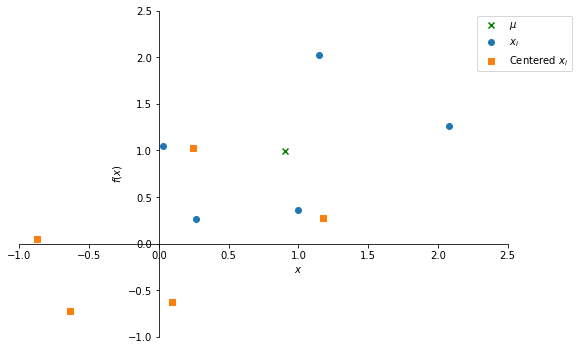

In [6]:
x_coords = X[0]
y_coords = X[1]
fig, ax = utils.prepare_plot(x_coords, y_coords, xlimit=(-1, 3), ylimit=(-1, 2.5))

# Plot the mean
mean = np.mean(X, axis=1)
ax.scatter(mean[0], mean[1], color='g', marker='x', label="$\mu$")

# Plot data points
ax.scatter(x_coords, y_coords, label='$x_i$')

# Plot centered data points
mean_vector = np.mean(X, axis=1).reshape(D, 1)
X_centered = X - mean_vector
x_coords = X_centered[0]
y_coords = X_centered[1]
ax.scatter(x_coords, y_coords, marker='s', label='Centered $x_i$')

ax.legend();

Notice how orange boxes represents the blue dots minus the mean point. Let us compute the scatter matrix defined on the dataset i.e., $\tilde{S}_T = \bar{X}\bar{X}^T$:

In [7]:
scatter_matrix = np.dot((X - mean_vector), (X - mean_vector).T)
scatter_matrix

array([[2.61930241, 0.93573401],
       [0.93573401, 2.06595106]])

<div class="sidenote">
<b>Scatter Matrix vs. Covariance Matrix</b>: The equation for the scatter matrix is similar to the equation of the covariance matrix:

$$
\frac{1}{N-1} \sum_{i=1}^{N} (\mathbf{x}_i - \mu)(\mathbf{x}_i - \mu)^T
$$

The only difference is that the covariance matrix is scaled by factor $1/(N-1)$. Performing eigen analysis on the matrices, will yield the same eigenspace i.e., the same eigenvectors are returned -- only the eigenvalues are scaled differently by a constant factor.
</div>

We can compute the covariance matrix using the scatter matrix:

In [8]:
covaraince_matrix = 1/(N-1) * scatter_matrix
covaraince_matrix

array([[0.6548256 , 0.2339335 ],
       [0.2339335 , 0.51648777]])

Numpy has a built-in function to compute the covariance matrix:

In [9]:
np.cov(X)

array([[0.6548256 , 0.2339335 ],
       [0.2339335 , 0.51648777]])

---
### Optimisation

Using the scatter matrix, we have now come up with a way to express variance of our dataset. Next, we need to formulate an objective function to find a projection matrix $W$ that maximises the scatter matrix $\tilde{S}_T$.

<img src="figures/lecture-16/pca-objective-function.png" width="600" />




where
- $W^{*}$ is the optimal solution for $W$
- $I \in \mathbb{R}^{D \times D}$ is the identity matrix
- $Tr(A)$ is the trace operator. It sums the diagonal elements of the matrix $A$

The solution of 2.16 is obtained by applying eigen-analysis to the scatter matrix $\tilde{S}_T$. $W^{*}$ is formed by the eigen-vectors of $\tilde{S}_T$ sorted in descending order of the corresponding eigen-values i.e., the column of $W^{*}$ are the eigen-vectors of $\tilde{S}_T$.

---
#### Why use the trace operator? 

Because we want $W^{*}$ to define an orthogonal transformation.

--- 
#### Why use the constraint W^T W=I?

---
#### Alternative Objective

<img src="figures/lecture-16/alternative-pca-objective-formulation.png" width="600" />




---
## Clustering